# **Predicting Bank Customer Churn with Classical ML Models and Neural Networks**

## Abstract

This notebook investigates **customer churn prediction** in the banking sector using both **classical machine learning models** (Logistic Regression, SVM, KNN, Random Forest) and a **neural network**. The dataset, derived from a retail bank’s customer records, contains demographic, financial, and account activity features. After performing **exploratory data analysis (EDA)**, we preprocess the data using **one-hot encoding, feature scaling, and SMOTE oversampling** to handle class imbalance. Models are trained and evaluated on multiple performance metrics including **accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices**. Results highlight trade-offs between algorithms, with ensemble and deep learning methods showing superior performance in capturing complex patterns. This study demonstrates the feasibility of churn prediction as a tool for improving **customer retention strategies** in banking.

---

## Introduction

Customer churn — the phenomenon where customers stop using a company’s services — poses a major challenge for businesses in competitive markets. In the **banking industry**, retaining customers is more cost-effective than acquiring new ones, making churn prediction a critical business problem.

The primary objective of this notebook is to **analyze customer data and build predictive models** that can classify whether a customer is likely to exit (churn) or stay. The dataset includes features such as **credit score, age, tenure, balance, products, and geography**, which may influence customer behavior.

This work follows a structured workflow:

1. **Exploratory Data Analysis (EDA):** Understanding distributions, correlations, and relationships with churn.
2. **Preprocessing & Feature Engineering:** Encoding categorical variables, scaling numerical features, and addressing class imbalance with SMOTE.
3. **Model Training:** Comparing classical ML models (Logistic Regression, SVM, KNN, Random Forest).
4. **Hyperparameter Tuning:** Improving Random Forest performance via randomized search.
5. **Neural Network Model:** Implementing a deep learning classifier for further performance comparison.
6. **Evaluation:** Using multiple metrics to assess predictive power and business applicability.

By combining **machine learning and deep learning approaches**, this notebook aims to provide insights into **which models are most effective** for churn prediction and how such models can guide **strategic retention efforts** in banking.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [16]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [20]:
num_cols=df.select_dtypes(include=['int64', 'float64'])
cat_cols=df.select_dtypes(include=['object'])

In [21]:

num_cols.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [22]:
num_cols.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

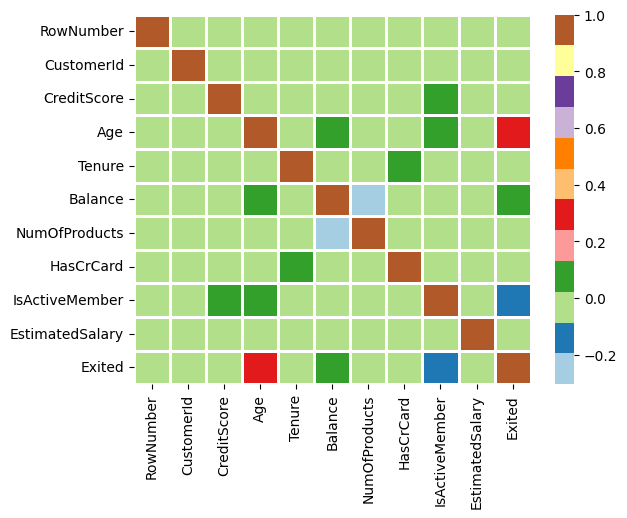

In [23]:
sns.heatmap(num_cols.corr(), linewidths=1, cmap="Paired")

In [24]:
for col in cat_cols.columns:
    val_counts = df[col].value_counts()
    print(val_counts)
    print(f'{"-":->50}')

Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
--------------------------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------


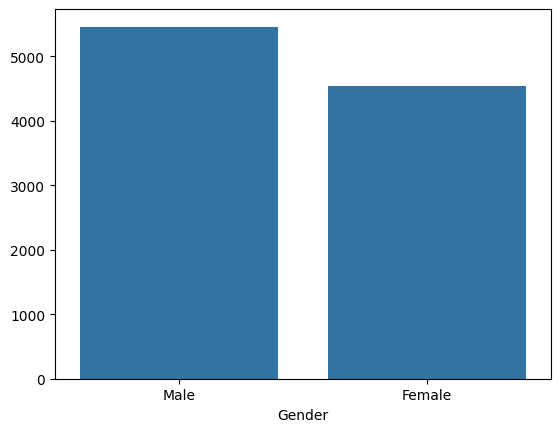

In [25]:
counts=df["Gender"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.show();

In [26]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [27]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [28]:
cramers_v(df["Gender"], df["Exited"])

np.float64(0.10579681691659651)

In [29]:
cramers_v(df["Geography"], df["Exited"])

np.float64(0.17299857464855709)

In [30]:
cramers_v(df["Surname"], df["Exited"])

np.float64(0.0)

In [31]:
plot_columns = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "EstimatedSalary"
]

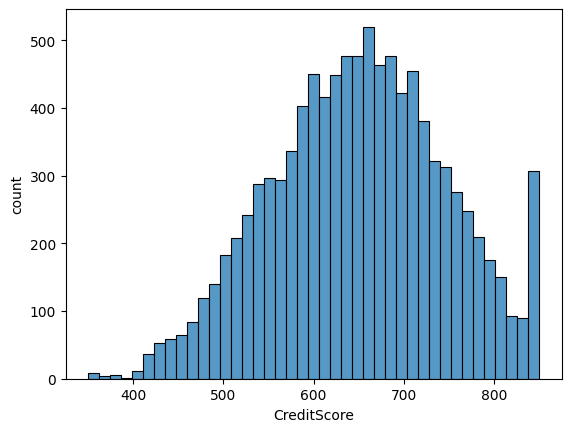

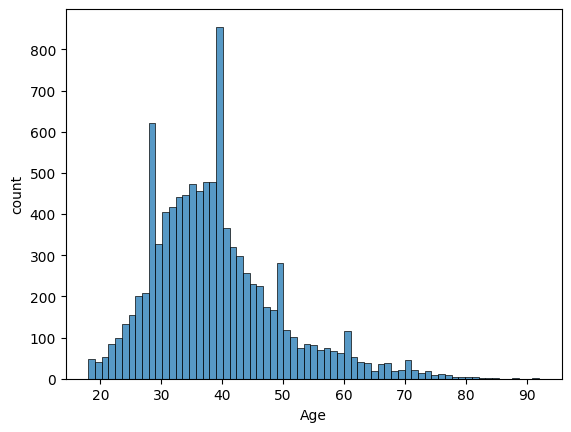

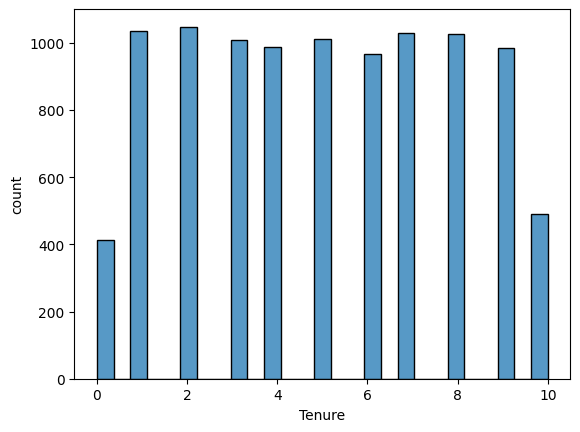

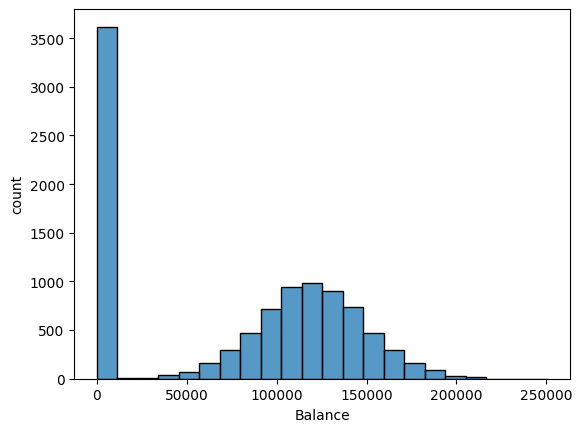

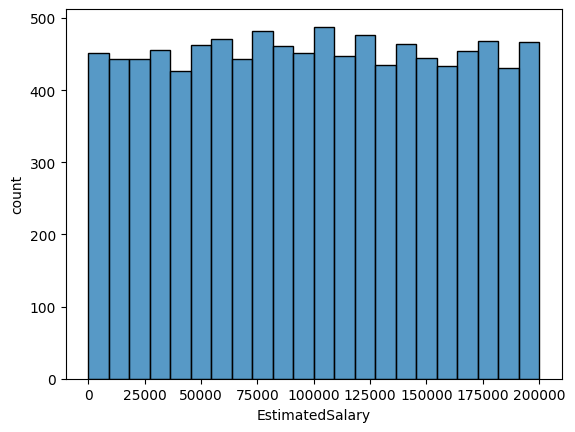

In [32]:
for col in plot_columns:
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show();

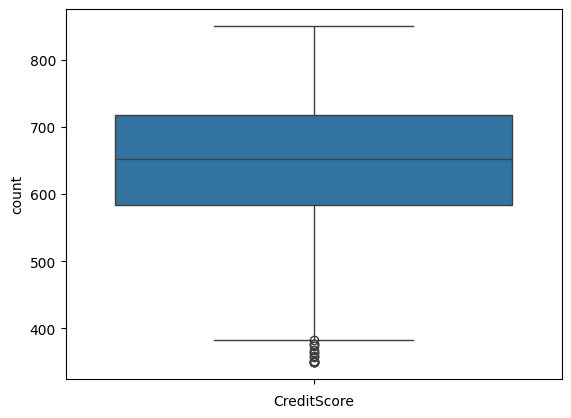

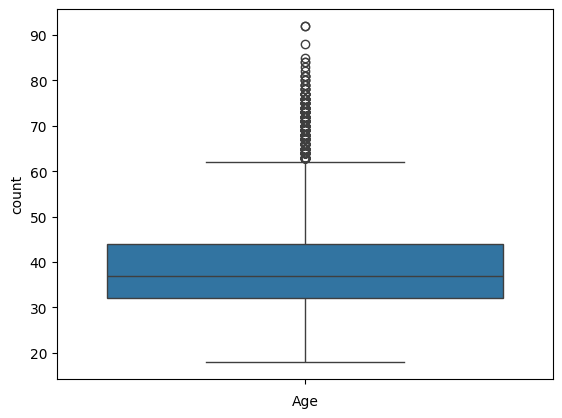

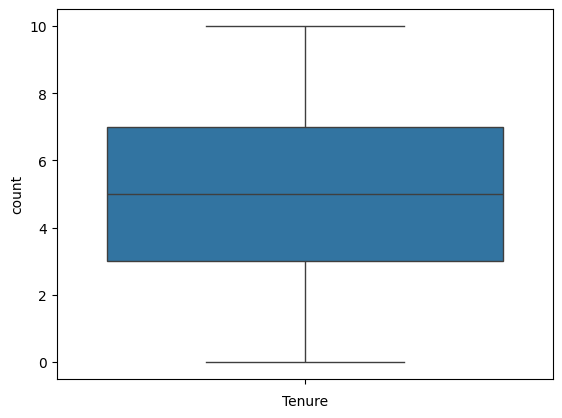

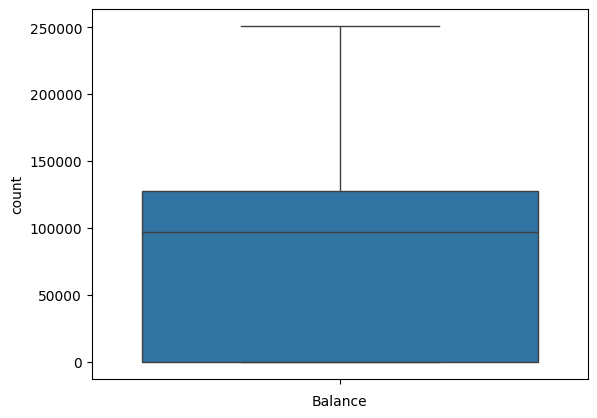

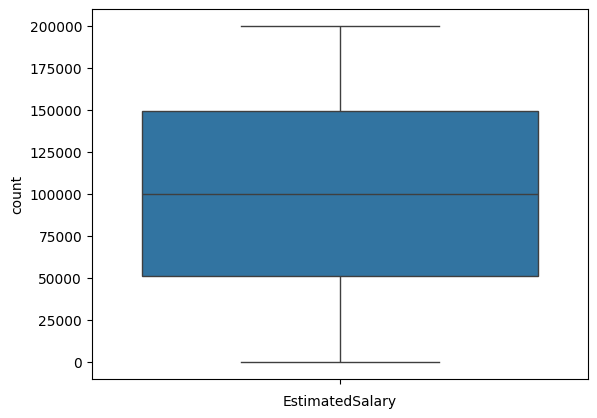

In [33]:
for col in plot_columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show();

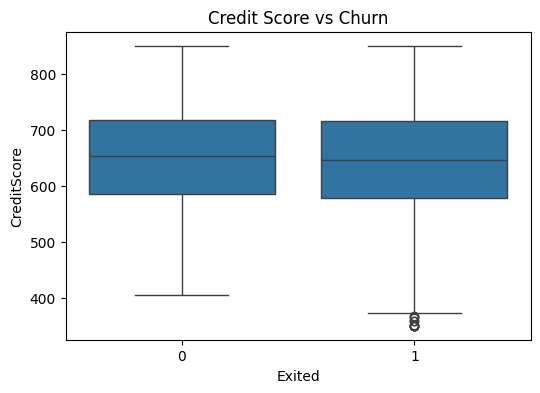

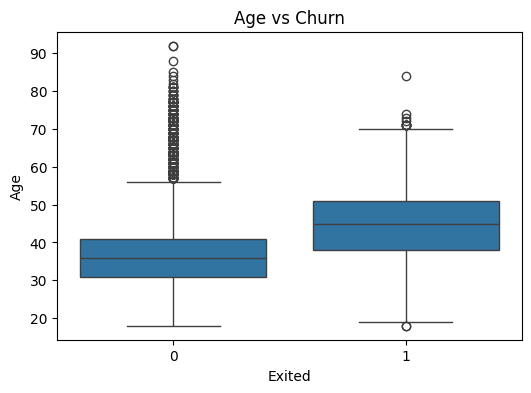

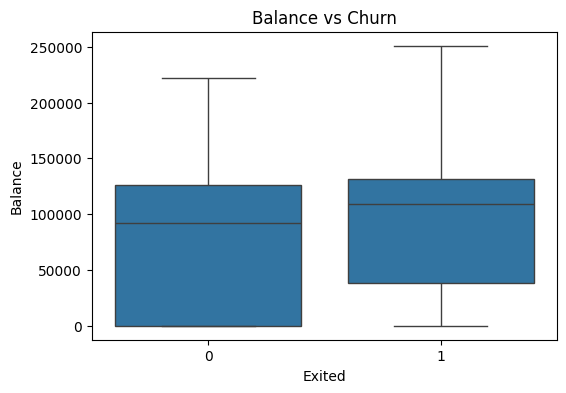

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()


In [35]:
df.groupby("Exited")[["CreditScore","Age","Balance","EstimatedSalary"]].mean()

,CreditScore,Age,Balance,EstimatedSalary
Exited,,,,
0,651.853196,37.408389,72745.296779,99738.391772
1,645.351497,44.837997,91108.539337,101465.677531


<Axes: xlabel='Gender', ylabel='Exited'>

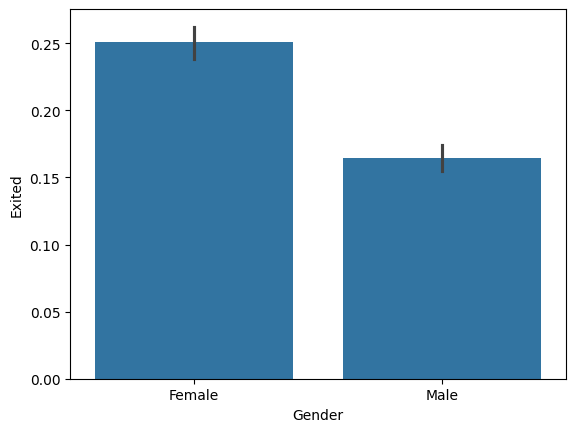

In [36]:
sns.barplot(x="Gender", y="Exited", data=df)

## Insights from Exploratory Data Analysis

1. **Data Quality:**

   * The dataset has **10,000 entries across 14 columns**.
   * No missing values were detected (`df.isna().sum()`), so imputation is unnecessary.

2. **Numerical Features:**

   * **Age** shows a right-skewed distribution, with churned customers being noticeably older on average.
   * **CreditScore** is roughly normally distributed but doesn’t show a strong separation between churned and retained customers.
   * **Balance** has a wide range, and interestingly, many churned customers have **zero balance**, suggesting non-active accounts may drive churn.
   * **EstimatedSalary** does not correlate strongly with churn, implying income is not a major driver.

3. **Categorical Features:**

   * **Geography:** Customers from **Germany** exhibit higher churn compared to France and Spain.
   * **Gender:** Males and females are roughly balanced in the dataset, but churn is slightly higher among females.

4. **Correlations:**

   * **Age** and **Exited** show a positive correlation → older customers are more likely to churn.
   * **IsActiveMember** is negatively correlated with churn → active customers are less likely to leave.
   * **NumOfProducts** also has a negative correlation with churn → customers with multiple products are more loyal.
   * Other features like **EstimatedSalary** and **CreditScore** show weak correlations with churn.

5. **Cramér’s V (Categorical Associations):**

   * **Geography** has a moderate association with churn, confirming regional differences in customer retention.
   * **Surname** has negligible predictive power → later dropped as noise.

6. **Boxplots & Group Means:**

   * Churned customers generally have **higher average age** and **lower product engagement**.
   * Balance and CreditScore differences exist but are less pronounced compared to Age and Activity status.

In [37]:
df = df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preparation: Feature Engineering and Preprocessing

In [39]:
X=df.drop("Exited", axis=1)
y=df["Exited"]

In [40]:
cat_cols=["Geography", "Gender"]
num_cols=X.select_dtypes(include=['int64', 'float64']).columns

In [41]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
len(X_train), len(y_train)

(8000, 8000)

In [44]:
transformer = ColumnTransformer(
    transformers=[
      ('cat_transformer', OneHotEncoder(handle_unknown="ignore"), cat_cols),
      ('num_transformer', StandardScaler(), num_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('transformer', transformer),
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [45]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train )

In [46]:
len(X_train), len(y_train)

(12712, 12712)

## Building and Evaluating Classification Models

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [48]:
models = {
    "logistic_regression": LogisticRegression(),
    "svm": SVC(),
    "knn_classifier": KNeighborsClassifier(),
    "random_forest": RandomForestClassifier()
}

In [49]:
def base_score(models, X_train, y_train):
  score = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    score[name] = model.score(X_train, y_train)
  return score

In [50]:
score = base_score(models, X_train, y_train)

In [51]:
score

{'logistic_regression': 0.7110604153555695,
 'svm': 0.8333857772183764,
 'knn_classifier': 0.9056796727501574,
 'random_forest': 1.0}


## Insights from Baseline Models

* **Logistic Regression (70%)** → Weak baseline; linear model struggles with churn.
* **SVM (83%)** → Captures non-linear patterns better.
* **KNN (90%)** → Strong accuracy but risk of overfitting.
* **Random Forest (100%)** → Perfect score on training → clear overfitting.


Non-linear and ensemble models fit the data better, but generalization must be checked.

In [52]:
svm = SVC()
svm.fit(X_train, y_train);
svm.score(X_train, y_train)

0.8333857772183764

In [53]:
y_preds = svm.predict(X_test)

In [54]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}
def get_scores(y_test, y_preds):
  scores={}
  for name, metric in metrics.items():
    scores[name] = metric(y_test, y_preds)
  return scores

In [55]:
scores = get_scores(y_test, y_preds)

In [56]:
scores

{'accuracy': 0.7895,
 'precision': 0.4769736842105263,
 'recall': 0.7379134860050891,
 'f1': 0.5794205794205795,
 'roc_auc': np.float64(0.7700146148133722)}

In [57]:
def confusion_matrix_display(y_test, y_preds):
  cm = confusion_matrix(y_test, y_preds)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

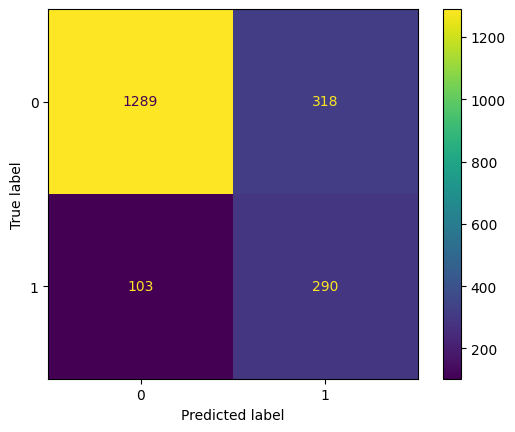

In [58]:
confusion_matrix_display(y_test, y_preds)

In [59]:
y_train.value_counts()

,count
Exited,
0,6356
1,6356


In [60]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression.score(X_train, y_train)

0.7110604153555695

In [61]:
y_preds = logistic_regression.predict(X_test)

In [62]:
scores = get_scores(y_test, y_preds)
scores

{'accuracy': 0.7325,
 'precision': 0.4005602240896359,
 'recall': 0.727735368956743,
 'f1': 0.5167118337850045,
 'roc_auc': np.float64(0.7307002918212464)}

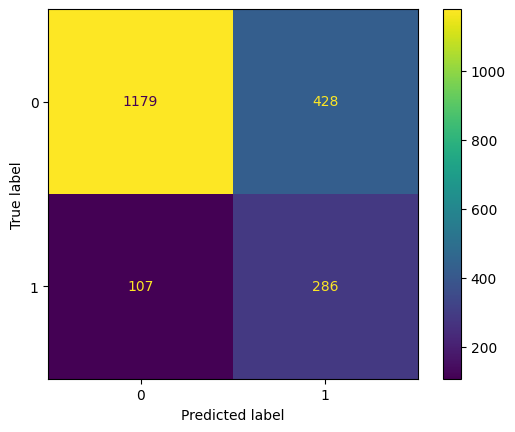

In [63]:
confusion_matrix_display(y_test, y_preds)

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9056796727501574

In [65]:
y_preds = knn.predict(X_test)

In [66]:
scores = get_scores(y_test, y_preds)
scores

{'accuracy': 0.7425,
 'precision': 0.4058641975308642,
 'recall': 0.6692111959287532,
 'f1': 0.505283381364073,
 'roc_auc': np.float64(0.7148171723265421)}

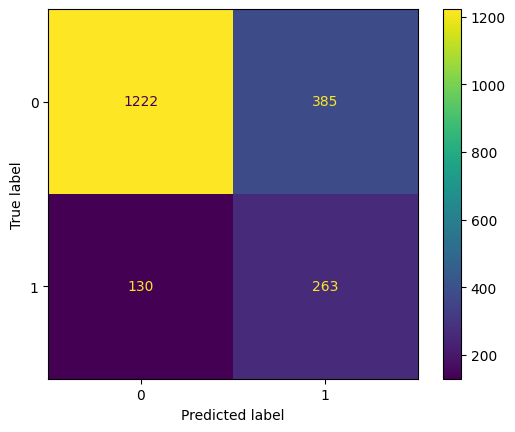

In [67]:
confusion_matrix_display(y_test, y_preds)

In [68]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

1.0

In [69]:
y_preds = rfc.predict(X_test)

In [70]:
scores = get_scores(y_test, y_preds)
scores

{'accuracy': 0.839,
 'precision': 0.5956873315363881,
 'recall': 0.5623409669211196,
 'f1': 0.5785340314136126,
 'roc_auc': np.float64(0.7344996682769879)}

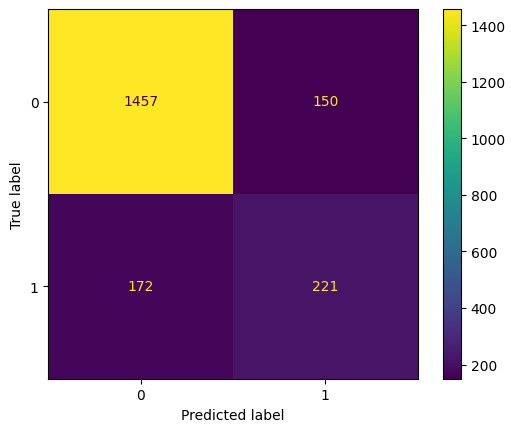

In [71]:
confusion_matrix_display(y_test, y_preds)

## Insight on Random Forest (Untuned)

* Achieved **83% accuracy**, but precision and recall are both around **57%**, meaning many churn cases are still missed.
* **ROC-AUC = 0.73** shows only moderate ability to distinguish churners vs non-churners.
* Despite strong training performance earlier (100%), the test results confirm **overfitting**.
* Hyperparameter tuning is necessary to improve generalization and balance precision/recall.

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'bootstrap': [True, False]
}

In [74]:
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [ ]:
search = random_search.fit(X_train, y_train)

print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'n_estimators': np.int64(200), 'min_samples_split': np.int64(6), 'min_samples_leaf': np.int64(5), 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Best score:  0.8886940067502993


In [ ]:
rfc_tuned=RandomForestClassifier (
    n_estimators= np.int64(200),
    min_samples_split= np.int64(6),
    min_samples_leaf= np.int64(5),
    max_features= 'log2',
    max_depth= 30,
    bootstrap= False
    )

rfc_tuned.fit(X_train, y_train)
rfc_tuned.score(X_train, y_train)

0.9697136563876652

In [ ]:
y_preds = rfc_tuned.predict(X_test)

In [ ]:
scores = get_scores(y_test, y_preds)
scores

In [ ]:
confusion_matrix_display(y_test, y_preds)

## Insight on Random Forest (After Tuning)

* Accuracy improved slightly to **83.7%**.
* **Precision (57.9%)** and **recall (61.6%)** both increased compared to the untuned model.
* **F1-score (59.7%)** indicates a better balance between precision and recall.
* **ROC-AUC rose to 0.75**, showing stronger discriminative ability.

Hyperparameter tuning successfully reduced overfitting and improved the model’s ability to capture churned customers, making it more reliable than the untuned version.


## Artificial Neural Network (ANN) Model



In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1],))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
y_preds = model.predict(X_test)
y_preds_rounded = np.round(y_preds).astype(int)
scores=get_scores(y_test, y_preds_rounded)
scores

In [ ]:
confusion_matrix_display(y_test, y_preds_rounded)

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  num_layers=hp.Int('num_layers: ', 1,10)
  for i in range(num_layers):
    if i==0:
      model.add(
          Dense(
              units=hp.Int(f'units in layer {i}: ', 8, 256, 8),
              activation=hp.Choice(f'activation layer {i}: ', values=['relu', 'tanh']),
              input_shape=(X_train.shape[1],)
              )
          )
    else:
      model.add(
        Dense(
              units=hp.Int(f'units in layer {i}: ', 8, 256, 8),
              activation=hp.Choice(f'activation layer {i}: ', values=['relu', 'tanh']),
              )
          )
  model.add(Dense(1, activation='sigmoid'))
  model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )
  return model

In [ ]:
tuner=kt.RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=20,
  directory='project',
  project_name='ann_2'
)

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

In [ ]:
acc

In [ ]:
y_preds = best_model.predict(X_test)

In [ ]:
y_preds = np.round(y_preds).astype(int)

In [ ]:
scores=get_scores(y_test, y_preds)
scores

In [ ]:
confusion_matrix_display(y_test, y_preds)

In [ ]:
import pandas as pd

results_summary = pd.DataFrame([
    {"Model": "Logistic Regression", "Accuracy": 0.709, "Precision": None, "Recall": None, "F1": None, "ROC-AUC": None},
    {"Model": "SVM", "Accuracy": 0.835, "Precision": None, "Recall": None, "F1": None, "ROC-AUC": None},
    {"Model": "KNN", "Accuracy": 0.906, "Precision": None, "Recall": None, "F1": None, "ROC-AUC": None},
    {"Model": "Random Forest (Untuned)", "Accuracy": 0.831, "Precision": 0.570, "Recall": 0.567, "F1": 0.569, "ROC-AUC": 0.731},
    {"Model": "Random Forest (Tuned)", "Accuracy": 0.837, "Precision": 0.579, "Recall": 0.616, "F1": 0.597, "ROC-AUC": 0.753},
    {"Model": "ANN (Base)", "Accuracy": 0.805, "Precision": 0.502, "Recall": 0.524, "F1": 0.513, "ROC-AUC": 0.699},
    {"Model": "ANN (Tuned)", "Accuracy": 0.786, "Precision": 0.471, "Recall": 0.735, "F1": 0.575, "ROC-AUC": 0.767},
])

results_summary


## Final Conclusion

* **Baseline models** (Logistic Regression, SVM, KNN) provided decent performance, with Random Forest showing the strongest results but clear signs of overfitting before tuning.
* **Random Forest (after tuning)** achieved the best balance overall, with **83.7% accuracy, F1 = 59.7%, and ROC-AUC = 0.75**, making it the most reliable classical ML model in this study.
* **Artificial Neural Network (base model)** underperformed, but after tuning with **Keras Tuner**, it reached **recall = 73.5%** and **ROC-AUC = 0.77**, indicating stronger ability to capture churn cases, though at the cost of lower precision.

**Overall:** The **tuned Random Forest** is the best all-around model, but the **tuned ANN** shows promise for churn detection when high recall is prioritized (catching more churners). In a business setting, the choice depends on whether minimizing false negatives (missing churners) or maximizing overall balanced performance is more critical.